Number plate recognition (NPR) is the process of identifying and extracting text from images of vehicle number plates. NPR has a wide range of applications, including traffic monitoring, parking management, and law enforcement.

In this project, i developed a number plate recognition system using EasyOCR and OpenCV. EasyOCR is an open-source optical character recognition (OCR) library that can be used to detect and recognize text in images. OpenCV is a popular computer vision library that can be used for a variety of tasks, including image processing, machine learning, and computer graphics.

The NPR system works as follows:

We load the image of the vehicle number plate into OpenCV.
We use OpenCV to process the image to make it easier for EasyOCR to extract the number plate. This may involve steps such as noise reduction, edge detection, and contour detection.
We use EasyOCR to detect and recognize the text in the processed image.
We extract the number plate from the recognized text.


In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


In [5]:
def convert_gray(image):
   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   return gray


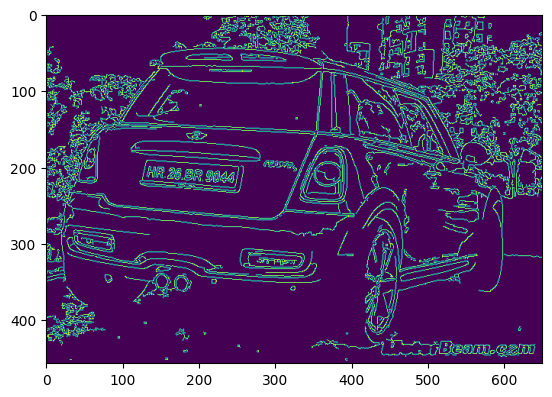

In [16]:
def detect_edges(image):
  """Detects edges in an image using the Canny edge detector.

  Args:
    image: A NumPy array representing the image.

  Returns:
    A NumPy array representing the edge image.
  """

  # Convert the image to grayscale.
  gray = convert_gray(image)


  # Apply a bilateral filter to reduce noise.
  bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

  # Detect edges in the image using the Canny edge detector.
  edged = cv2.Canny(bfilter, 30, 200)

  # Return the edge image.
  return edged

# Read the input image.
input_image = cv2.imread("/image1.jpg")

# Detect edges in the image.
edged = detect_edges(input_image)


# Display the edge image.
plt.imshow(edged)
plt.show()

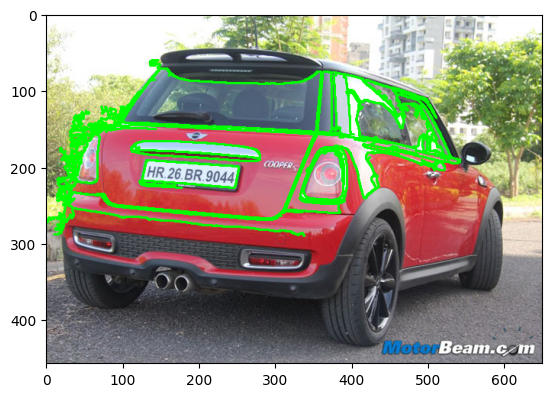

In [7]:
def find_top_10_contours(image):
  """Finds the top 10 contours in an image.

  Args:
    image: A NumPy array representing the image.

  Returns:
    A list of the top 10 contours in the image.
  """

  # Find contours in the image.
  keypoints = cv2.findContours(image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)

  # Sort the contours by area in descending order.
  contours = sorted(contours, key=cv2.contourArea, reverse=True)

  # Return the top 10 contours.
  return contours[:10]

# Read the input image.
#image = cv2.imread("/image1.jpg")

# Detect edges in the image.
#edged = detect_edges(image)

# Find the top 10 contours in the edge image.
top_10_contours = find_top_10_contours(edged)

# Draw the top 10 contours on the image.
for contour in top_10_contours:
  cv2.drawContours(input_image, [contour], -1, (0, 255, 0), 2)

rgb_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image.
plt.imshow(rgb_image)
plt.show()


In [8]:
def find_rectangle_contour(contours):
  """Finds the first rectangular contour in a list of contours.

  Args:
    contours: A list of contours.

  Returns:
    A NumPy array representing the rectangular contour, or None if no rectangular
    contour is found.
  """

  location = None
  for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
      location = approx
      break

  return location
np_position=find_rectangle_contour(top_10_contours)

In [9]:
#array representing position of number plate
np_position

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [10]:
#mask is used to cover any area of the image that is not the number plate
mask = np.zeros(convert_gray(input_image).shape, np.uint8)
new_image = cv2.drawContours(mask, [np_position], 0, 255, -1)
new_image = cv2.bitwise_and(input_image, input_image, mask=mask)

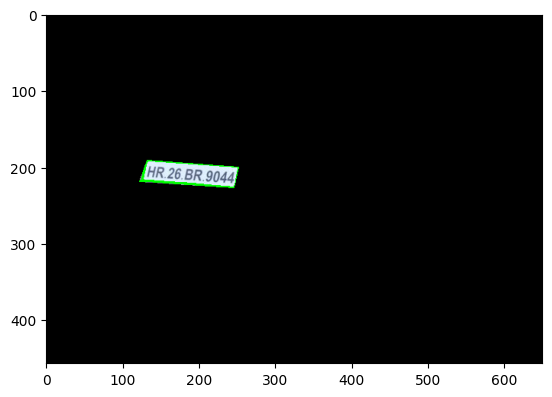

In [11]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [12]:
# Find the coordinates of the white pixels in the mask.
(x, y) = np.where(mask == 255)

# Find the minimum and maximum x- and y-coordinates of the white pixels.
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))

# Convert the input image to grayscale.
grayscale_image = convert_gray(input_image)

# Crop the grayscale image using the minimum and maximum x- and y-coordinates.
cropped_image = grayscale_image[x1:x2+1, y1:y2+1]


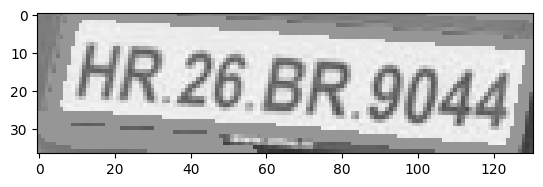

In [13]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [17]:
# Create a new EasyOCR reader object.
reader = easyocr.Reader(['en'])

# Call the `readtext()` function on the reader object, passing in the cropped image as the argument.
result = reader.readtext(cropped_image)

# The `readtext()` function returns a list of results, each of which contains the text that was detected in the image, as well as the confidence score for the detection.


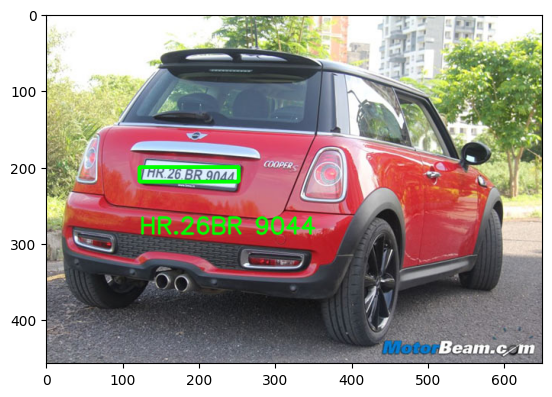

In [18]:
# Load the image.
img = cv2.imread("/image1.jpg")

# Get the text that was detected in the image.
text = result[0][-2]

# Create a new font object.
font = cv2.FONT_HERSHEY_SIMPLEX

# Draw the text onto the image.
res = cv2.putText(img, text=text, org=(np_position[0][0][0], np_position[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)

# Draw a rectangle around the detected text.
res = cv2.rectangle(img, tuple(np_position[0][0]), tuple(np_position[2][0]), (0,255,0),3)

# Convert the image from BGR to RGB.
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

# Display the image.
plt.imshow(res)
